# Big Data Management and Analysis in Physics Research - Progetto

## Esercizio Decision Tree - Consegna

L'Organizzazione mondiale della sanità ha stimato che 12 milioni di decessi si verificano in tutto il mondo, ogni anno a causa di malattie cardiache. La metà dei decessi negli Stati Uniti e in altri paesi sviluppati è dovuta a malattie cardiovascolari. La prognosi precoce delle malattie cardiovascolari può aiutare a prendere decisioni sui cambiamenti dello stile di vita nei pazienti ad alto rischio e, a sua volta, ridurre le complicanze.

In questo esercizio si chiedere di utilizzare i decision tree (e magari i boosted decision trees) per individuare i fattori di rischio / delle malattie cardiache più rilevanti e prevedere il rischio complessivo.

Il dataset con i dati che useremo si trova nel filw `data/framingham.csv`. Il dataset contiene i seguenti dati:

Demografici:
- male: maschio o femmina (nominale)
- age: età del paziente (continua - Sebbene le età registrate siano state troncate a numeri interi, il concetto di età è continuo)

Comportamentali:
- currentSmoker: se il paziente sia o meno un fumatore attuale (nominale)
- cigsPerDay: il numero di sigarette che la persona ha fumato in media in un giorno (può essere considerato continuo in quanto si può avere un numero qualsiasi di sigarette, anche mezza sigaretta)

Storia medica:
- BPMeds: se il paziente assumeva o meno un farmaco per la pressione arteriosa (nominale)
- prevalentStroke: se il paziente ha avuto o meno un ictus (nominale)
- prevalentHyp: se il paziente è iperteso (nominale)
- diabetes: se il paziente ha o meno il diabete (nominale)

Situazione medica attuale:
- totChol: livello di colesterolo totale (continuo)
- sysBP: pressione arteriosa sistolica (continua)
- diaBP: pressione arteriosa diastolica (continua)
- BMI: indice di massa corporea (continuo)
- heartRate: frequenza cardiaca (continua - Nella ricerca medica, variabili come la frequenza cardiaca, sebbene in realtà discrete, sono comunque considerate continue a causa del gran numero di possibili valori)
- glucose: livello di glucosio (continuo)

Variabile che si vuole predire (target desiderato):
- TenYearCHD: Rischio di malattia coronarica nei prossimi 10 anni CHD (binario: '1' significa sì, '0' significa no)

Si richiede di leggere il dataset, fare una parte di statistica descrittiva e quindi di provare a creare un albero decisionale sui dati in esso contenuti per descrivere quali variabili influiscono maggiormente sulla probabilità di sviluppare la malattia nei prossimi 10 anni.

L'albero può essere troncato ad una profondità di qualche livello e deve essere allegato e discusso con alcune considerazioni sul dataset.

Dopo la realizzazione dell'albero, viene richiesto di disegnarlo e caricare l'immagine nel notebook (è possibile utilizzare il sito internet visto a lezione (http://webgraphviz.com).
I risultati ottenuti nell'albero devono essere quindi brevemente commentati.

### Import Librerie

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns

### Import Dati

In [2]:
X = pd.read_csv("data/framingham.csv", na_values='?')
X.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## Analisi Descrittiva

L'obiettivo di questo notebook è la realizzazione di un albero decisionale per prevedere la variabile binaria `TenYearCHD`, i.e., il rischio di malattia coronarica nei prossimi 10 anni.

Iniziamo con un'analisi descrittiva del dataset, cercando anche relazioni tra le variabili contenute nel dataset e il rischio di malattia coronarica.

In [3]:
X.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

Con la funzione `describe` di `pandas` otteniamo una tabella di statistiche di ogni variabile continua del dataframe.

In [4]:
cont_vars = ["age", "cigsPerDay", "totChol", "sysBP", "diaBP", "BMI", "heartRate", "glucose"]
X[cont_vars].describe()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,4238.000000,4209.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000
mean,49.584946,9.003089,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753
std,8.572160,11.920094,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998
min,32.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000
25%,42.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000
50%,49.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000
75%,56.000000,20.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000
max,70.000000,70.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000


Per le variabili binarie e categoriche possiamo calcolare le proporzioni di ciascuna classe:

In [5]:
binary_vars = list(set(X.columns) - set(cont_vars) - {"education"})

In [6]:
for var in binary_vars:
    print(var)
    print("\tNegative class: {:>5.2f}%\n\tPositive class: {:>5.2f}%"\
          .format(*np.unique(X[var], return_counts=True)[1]/X.shape[0]*100))
    if np.any(np.isnan(X[var])):
        print(f"\tMissing: {np.sum(np.isnan(X[var]))/X.shape[0]*100:>12.2f}%")
    print()
    
print("education")
for i, j in enumerate(np.unique(X.education.dropna(), return_counts = True)[1]/X.shape[0]*100):
    print(f"\tCategory {i+1}: {j:>9.2f}%")
print(f"\tMissing: {np.sum(np.isnan(X.education))/X.shape[0]*100:>12.2f}%")

prevalentHyp
	Negative class: 68.95%
	Positive class: 31.05%

BPMeds
	Negative class: 95.82%
	Positive class:  2.93%
	Missing:         1.25%

male
	Negative class: 57.08%
	Positive class: 42.92%

currentSmoker
	Negative class: 50.59%
	Positive class: 49.41%

prevalentStroke
	Negative class: 99.41%
	Positive class:  0.59%

TenYearCHD
	Negative class: 84.80%
	Positive class: 15.20%

diabetes
	Negative class: 97.43%
	Positive class:  2.57%

education
	Category 1:     40.59%
	Category 2:     29.57%
	Category 3:     16.21%
	Category 4:     11.16%
	Missing:         2.48%


### Relazioni tra rischio CHD e variabili categoriche

Visualizziamo graficamente se ci sono differenze di rischio CHD tra diverse categorie (e.g., fumatori vs. non fumatori).

In [7]:
# Variables for plotting.
sex = X.male.map({True : "Male", False : "Female"}).rename("Sex")
smoker = X.currentSmoker.map({True : "Smoker", False : "Non-Smoker"})
diabetes = X.diabetes.map({True : "Diabetic", False : "Non-Diabetic"})
CHD10Y = X.TenYearCHD.map({True : "CHD Risk", False : "No CHD Risk"})

Dal grafico a barre non sembra esserci una differenza significativa tra fumatori e non fumatori, e quindi una relazione significativa tra l'essere fumatori e avere un più alto rischio di CHD.

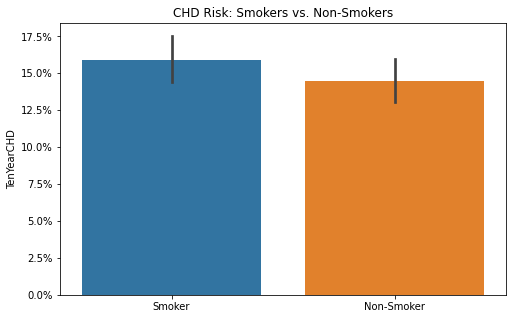

In [8]:
plt.figure(figsize=(8,5))
ax = sns.barplot(x = smoker, y = X.TenYearCHD, order=["Smoker", "Non-Smoker"])
ax.yaxis.set_major_formatter(ticker.PercentFormatter(1))
plt.xlabel('')
plt.title("CHD Risk: Smokers vs. Non-Smokers")
plt.show()

Per essere sicuri che non ci sia una relazione tra le due variabili, confermiamo con un test chi-square:

In [9]:
from scipy.stats import chi2_contingency

In [10]:
def chisq(cat1, cat2, X):
    crosstab = pd.crosstab(X[cat1], X[cat2])
    chi, p, _, _ = chi2_contingency(crosstab)
    return chi, p

In [11]:
cat1 = "currentSmoker"
cat2 = "TenYearCHD"
chi, p = chisq(cat1, cat2, X)
print(f"Chi-square test.\nH0: the categories \"{cat1}\" and \"{cat2}\" are independent:")
print(f"p value: {p:.3f}")

Chi-square test.
H0: the categories "currentSmoker" and "TenYearCHD" are independent:
p value: 0.221


Il valore del p value conferma (non rifiuta) l'ipotesi che non ci sia una relazione significativa tra il rishio di CHD e il fumo.

Il rischio di CHD sembra invece significativamente maggiore negli uomini che nelle donne:

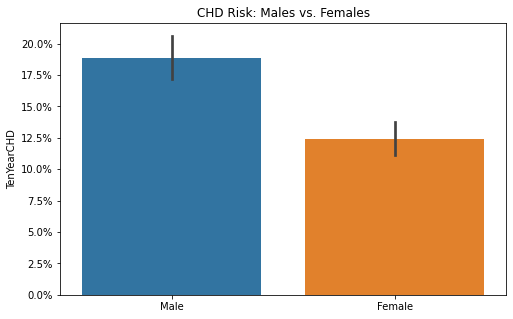

In [12]:
plt.figure(figsize=(8,5))
ax = sns.barplot(x = sex, y = X.TenYearCHD)
plt.xlabel("")
ax.yaxis.set_major_formatter(ticker.PercentFormatter(1))
plt.title("CHD Risk: Males vs. Females")
plt.show()

In [13]:
cat1 = "male"
cat2 = "TenYearCHD"
chi, p = chisq(cat1, cat2, X)
print(f"Chi-square test.\nH0: the categories \"{cat1}\" and \"{cat2}\" are independent:")
print(f"p value: {p:.3e}")

Chi-square test.
H0: the categories "male" and "TenYearCHD" are independent:
p value: 1.107e-08


Il rischio di CHD è anche maggiore nei soggetti diabetici:

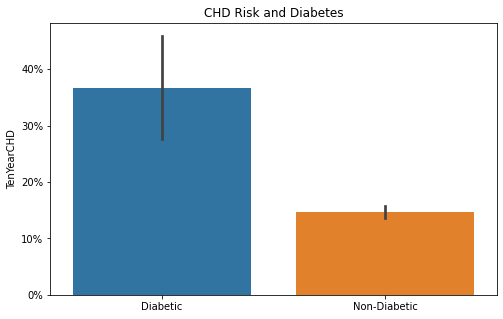

In [14]:
plt.figure(figsize=(8,5))
ax = sns.barplot(diabetes, y = X.TenYearCHD, order=["Diabetic", "Non-Diabetic"])
ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
plt.xlabel("")
plt.title("CHD Risk and Diabetes")
plt.show()

In [15]:
cat1 = "diabetes"
cat2 = "TenYearCHD"
chi, p = chisq(cat1, cat2, X)
print(f"Chi-square test.\nH0: the categories \"{cat1}\" and \"{cat2}\" are independent:")
print(f"p value: {p:.3e}")

Chi-square test.
H0: the categories "diabetes" and "TenYearCHD" are independent:
p value: 5.641e-10


Proviamo a combinare più categorie:

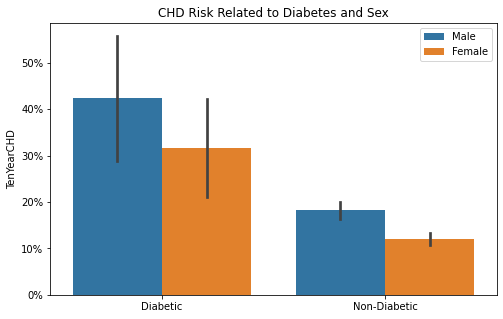

In [16]:
plt.figure(figsize=(8,5))
ax = sns.barplot(diabetes, y = X.TenYearCHD, hue=sex, order=["Diabetic", "Non-Diabetic"])
ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0))
plt.legend(title="")
plt.xlabel("")
plt.title("CHD Risk Related to Diabetes and Sex")
plt.show()

Se si considerano solamente i soggetti diabetici, non sembra esserci una relazione significativa tra le variabili "TenYearCHD" e "male".

Tra i non diabetici, questa relazione continuare a essere significativa. Facciamo due $t$ test per confermare.

In [17]:
chi, p = chisq("male", "TenYearCHD", X[X.diabetes == True])
# print(f"Chi-square test for the independence of the categories \"{cat}\" and \"TenYearCHD\":")
print(f"H0: Sex and CHD risk are independent among diabetic subjects.\np value: {p:.3f}")

H0: Sex and CHD risk are independent among diabetic subjects.
p value: 0.336


In [18]:
chi, p = chisq("male", "TenYearCHD", X[X.diabetes == False])
# print(f"Chi-square test for the independence of the categories \"{cat}\" and \"TenYearCHD\":")
print(f"H0: Sex and CHD risk are independent among non-diabetic subjects.\np value: {p:.3e}")

H0: Sex and CHD risk are independent among non-diabetic subjects.
p value: 3.391e-08


#### CHD e variabili continue

In [19]:
from scipy.stats import ttest_ind

Usiamo le funzioni `violinplot`, `kdeplot` e `boxplot` di seaborn per visualizzare se e come varia la distribuzione (stimata) di diverse variabili continue tra soggetti a rischio CHD e non. Usiamo il t test per capire se c'è una differenza significativa tra le medie di queste variabili continue tra soggetti a richio CHD e non.

In [20]:
def ttest(var, X):
    v1 = X[X.TenYearCHD == 1][var]
    v2 = X[X.TenYearCHD == 0][var]
    v1 = v1[~np.isnan(v1)]
    v2 = v2[~np.isnan(v2)]
    t, p, = ttest_ind(v1, v2)
    return t, p

In [21]:
def plot_continuous_vs_CHD(var, X, label=None, decimals = 1):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))

    if label is None:
        label = var[0].upper()+var[1:]
    # Ax1
    sns.violinplot(x = CHD10Y, y = X[var], ax=ax1, cut=0)
    # cut=0: limit the plot range within the range of the observed data
    ax1.set_xlabel("")
    ax1.set_ylabel(label + " - Distribution Estimate")

    # Ax2
    sns.kdeplot(X[X.TenYearCHD == 0][var], label="No CHD risk", shade=True, ax=ax2, cut=0)
    sns.kdeplot(X[X.TenYearCHD == 1][var], label="CHD risk", shade=True, ax=ax2, cut=0)
    # cut=0: limit the plot range within the range of the observed data
    ax2.yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=decimals))
    ax2.set_xlabel(label + " - Distribution Estimate")

    # Ax3
    sns.boxplot(x = CHD10Y, y = X[var], ax=ax3)
    ax3.set_xlabel("")
    ax3.set_ylabel(label)
    
    t, p = ttest(var, X)
    if p < 1e-3:
        plt.suptitle(f"{label} vs. TenYearCHD\n$t$ test (difference between means) $p$ value: {p:.3e}")
    else:
        plt.suptitle(f"{label} vs. TenYearCHD\n$t$ test (difference between means) $p$ value: {p:.3f}")

    plt.show()

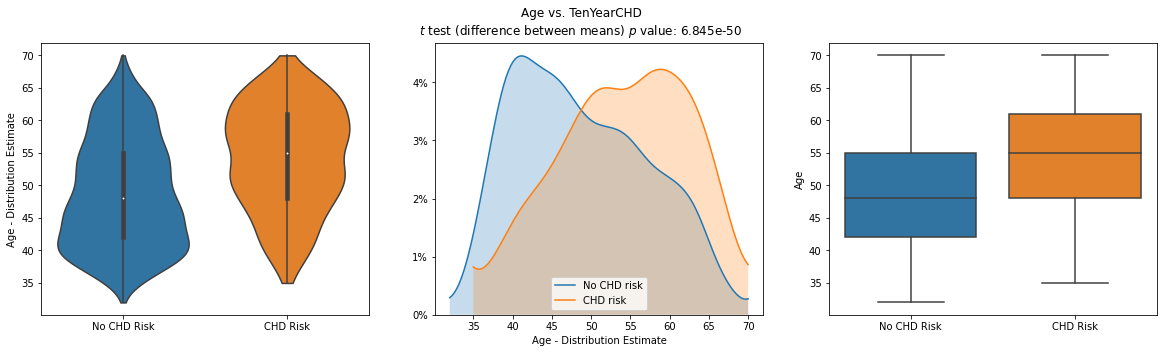

In [22]:
plot_continuous_vs_CHD("age", X, decimals = 0)

Come ci si aspetterebbe, i soggetti non a rischio di CHD sono tendenzialmente più giovani.

In [23]:
print(f"Età media soggetti non a rischio di CHD: {np.mean(X[X.TenYearCHD == 0].age):>.3f}")
print(f"Età media soggetti a rischio di CHD: {np.mean(X[X.TenYearCHD == 1].age):>10.3f}")

Età media soggetti non a rischio di CHD: 48.768
Età media soggetti a rischio di CHD:     54.146


In [24]:
t, p = ttest("age", X)
print(f"H0: the mean age of subjects with CHD risk is the same as the mean age of subjects with no CHD risk.\np value: {p}")

H0: the mean age of subjects with CHD risk is the same as the mean age of subjects with no CHD risk.
p value: 6.845008587441734e-50


Il $t$ test appoggia questa conclusione.

Visualizziamo graficamente altre variabili continue (i p value dei relativi test sono inclusi direttamente nel grafico).

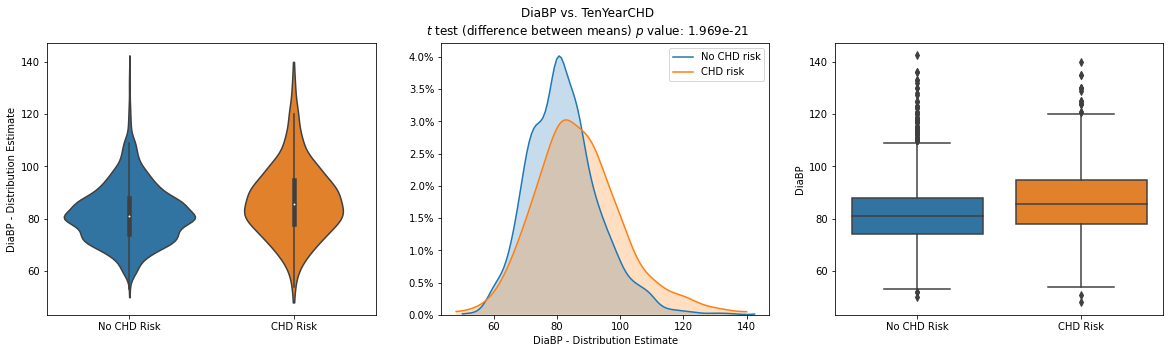

In [25]:
plot_continuous_vs_CHD("diaBP", X)

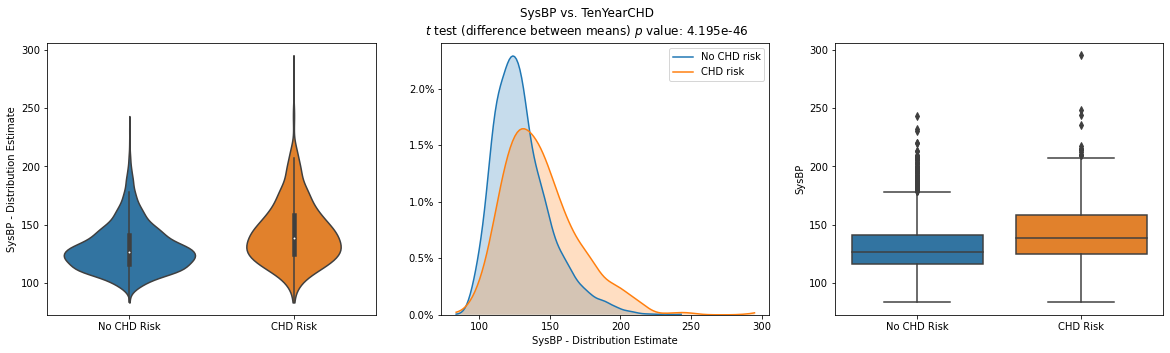

In [26]:
plot_continuous_vs_CHD("sysBP", X)

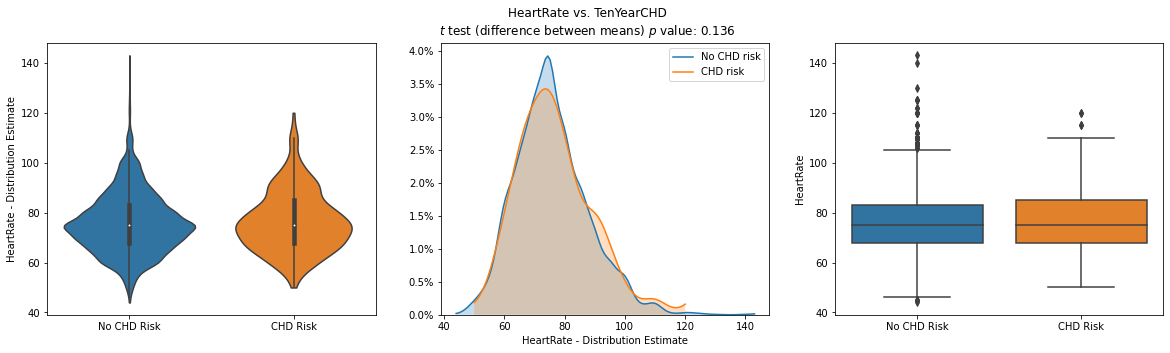

In [27]:
plot_continuous_vs_CHD("heartRate", X)

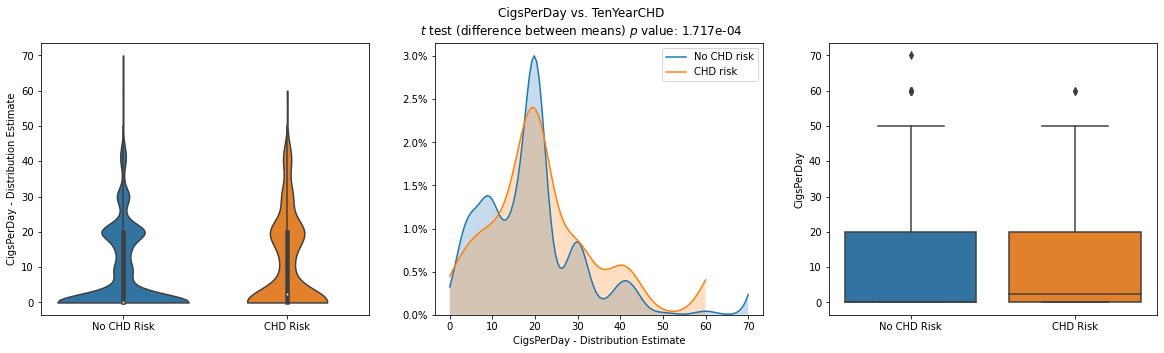

In [28]:
plot_continuous_vs_CHD("cigsPerDay", X)

## Decision Tree Classifier

Notiamo che le due classi di questa variabile sono sbilanciate, con la classe positiva che costituisce circa il 15% dei casi:

In [29]:
print('TenYearCHD')
print("\tNegative class proportion: {:.2f}%\n\tPositive class proportion: {:.2f}%"\
      .format(*np.unique(X.TenYearCHD, return_counts=True)[1]/X.shape[0]*100))

TenYearCHD
	Negative class proportion: 84.80%
	Positive class proportion: 15.20%


Un classificatore che prevede sempre la classe negativa otterrebbe quindi un'accuratezza dell'84.8%. Sarà quindi più importante valutare altre metriche come precision e recall.

### Preprocessing

#### Drop NA's

Eliminiamo le righe del dataset che contengono valori mancanti.

In [30]:
size_before = X.shape[0]
size_before

4238

In [31]:
np.sum(np.isnan(X))

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [32]:
X = X.dropna()

In [33]:
size_after = X.shape[0]
size_after

3656

In [34]:
print(f"Discarded {size_before - size_after} rows containing NAs ({(size_before - size_after)/size_before * 100:.2f}%)")

Discarded 582 rows containing NAs (13.73%)


Sono state eliminate 582 osservazioni (circa il 13%).

#### Convert "education" column to dummies

Il dataset contiene la variabile categorica con 4 livelli "education", che convertiamo in 3 variabili dummy.

In [35]:
X['education'] = X.education.astype('category')
X = pd.get_dummies(X, columns=["education"], drop_first=True)
X.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,education_2.0,education_3.0,education_4.0
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,0,0,1
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,1,0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,0,0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,0,1,0
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,0,1,0


#### Train-test split

Fissiamo il seed per poter riprodurre i risultati:

In [36]:
np.random.seed(0)

Salviamo `TenYearCHD` nella variabile `y` e la eliminiamo dal dataset, per poi procedere con la divisione tra train set e test set.

In [37]:
y = X.TenYearCHD
X = X.drop(columns="TenYearCHD")

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [39]:
X_train.columns

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'education_2.0',
       'education_3.0', 'education_4.0'],
      dtype='object')

## Decision Tree Classifier - Sklearn

In [40]:
from sklearn import tree
import xgboost as xgb

Iniziamo con un DCT della libreria sklearn:

In [41]:
def dct_f(X_train, y_train, *args, **kwargs):
    dct = tree.DecisionTreeClassifier(*args, **kwargs)
    dct.fit(X_train, y_train)

    return dct

In [42]:
dct = dct_f(X_train, y_train)

In [43]:
tree.export_graphviz(dct, out_file='out/tree2.dot', feature_names=X.columns, max_depth=3)

In [44]:
!dot -Tpng -O out/tree2.dot

Resulting tree:

![Tree](out/tree2.dot.png)

L'albero inizia a dividere le osservazioni a seconda del valore della variabile `age`, per poi continuare con le variabili `diaBP` e `sysBP`.

In [45]:
print(f"Tree depth: {dct.get_depth():9d}\nNumber of leaves: {dct.get_n_leaves()}")

Tree depth:        24
Number of leaves: 385


L'albero ha 24 livelli di profondità e 385 foglie.

Controlliamo quali sono le feature più efficaci per prevedere il rischio di CHD:

In [46]:
feature_importances = dct.feature_importances_

Dalla documentazione sklearn:

> The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.

In [47]:
features_rank = np.argsort(dct.feature_importances_)[::-1]

In [48]:
for k,v in dict(zip(X.columns[features_rank],
                        feature_importances[features_rank])).items():
    print(f"{k:16s}: {v:.3f}")

sysBP           : 0.147
totChol         : 0.133
BMI             : 0.130
glucose         : 0.126
age             : 0.124
heartRate       : 0.108
diaBP           : 0.093
cigsPerDay      : 0.061
education_3.0   : 0.017
male            : 0.016
education_4.0   : 0.015
education_2.0   : 0.014
prevalentHyp    : 0.006
prevalentStroke : 0.005
BPMeds          : 0.004
diabetes        : 0.003
currentSmoker   : 0.000


Si vede che la variabile `sysBP` è risultata la più importante, seguita da `totChol` e `BMI`. La variabile meno importante è `currentSmoker`, che conferma il risultato iniziale ottenuto con il test chi quadro sull'indipendenza tra questa variabile e `TenYearCHD`.

### Evaluate Decision Tree Classifier

In [49]:
from sklearn.metrics import classification_report

In [50]:
train_preds = dct.predict(X_train)
test_preds = dct.predict(X_test)

Valutazione sul train set:

In [51]:
print(classification_report(y_train, train_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2171
           1       1.00      1.00      1.00       388

    accuracy                           1.00      2559
   macro avg       1.00      1.00      1.00      2559
weighted avg       1.00      1.00      1.00      2559



Valutazione sul test set:

In [52]:
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       928
           1       0.21      0.21      0.21       169

    accuracy                           0.76      1097
   macro avg       0.54      0.54      0.54      1097
weighted avg       0.76      0.76      0.76      1097



Le performance sul test set non sono eccezionali, si vede che il DTC soffre di overfitting. L'accuratezza è buona, ma precision e recall della classe positiva sono molto bassi. In particolare questo significa che molte previsioni saranno falsi negativi.

Proviamo con i Boosted Decision Trees.

## Boosted trees

### Train

In [53]:
xgbtrain = xgb.DMatrix(data=X_train,
                       label=y_train)

param = {}

# Booster parameters
param['eta']              = 0.1 # learning rate
param['max_depth']        = 10  # maximum depth of a tree
param['subsample']        = 0.8 # fraction of events to train tree on
param['colsample_bytree'] = 0.8 # fraction of features to train tree on

# Learning task parameters
param['objective']   = 'binary:logistic' # objective function
param['eval_metric'] = 'error'           # evaluation metric for cross validation
param = list(param.items()) + [('eval_metric', 'logloss')] + [('eval_metric', 'rmse')]

num_trees = 100  # number of trees to make

np.random.seed(0)
booster = xgb.train(param, xgbtrain, num_boost_round=num_trees)

Importanza delle feature (dalla documentazione: 'gain' is the average gain across all splits the feature is used in).

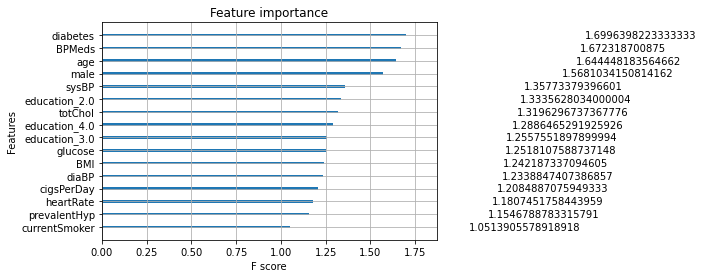

In [54]:
xgb.plot_importance(booster, importance_type="gain")
plt.show()

La variabile più importante per prevedere `TenYearCHD` risulta essere `diabetes`, seguita da `BPMeds` e `age`. Di nuovo, `currentSmoker` è la meno importante.

#### Valutazione Boosted Trees

In [55]:
train_preds = np.around(booster.predict(xgbtrain)).astype('int64')

Valutazione sul train set:

In [56]:
print(classification_report(y_train, train_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2171
           1       1.00      0.98      0.99       388

    accuracy                           1.00      2559
   macro avg       1.00      0.99      1.00      2559
weighted avg       1.00      1.00      1.00      2559



Valutazione sul test set:

In [57]:
xgbtest = xgb.DMatrix(data=X_test,
                       label=y_test)

test_preds = np.around(booster.predict(xgbtest)).astype('int64')

In [58]:
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       928
           1       0.50      0.11      0.18       169

    accuracy                           0.85      1097
   macro avg       0.68      0.54      0.55      1097
weighted avg       0.80      0.85      0.80      1097



Alcuni score sul test set sono migliori rispetto al DTC di sklearn, ma il recall della classe positiva è ancora più basso, che di nuovo significa che molte delle previsioni di questo classificatore saranno falsi negativi.